<a href="https://colab.research.google.com/github/natgalvano/Jewellery-Recommender/blob/master/Mejuri_Fastai_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from fastai import *
from fastai.vision import *
import matplotlib.pyplot as plt
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [0]:
bs = 16  #batch size: if your GPU is running out of memory, set a smaller batch size, i.e 16
sz = 224 #image size
PATH = '/content/drive/My Drive/Jewls/Train'

In [19]:
classes = []
for d in os.listdir(PATH):
    if os.path.isdir(os.path.join(PATH, d)) and not d.startswith('.'):
        classes.append(d) 
print ("There are ", len(classes), "classes:\n", classes) 

There are  4 classes:
 ['earring', 'necklace', 'ring', 'Bracelet']


In [34]:
for c in classes:
    print ("Class:", c)
    verify_images(os.path.join(PATH, c), delete=True);

Class: earring


Class: necklace


Class: ring


Class: Bracelet


In [35]:

data  = ImageDataBunch.from_folder(PATH, ds_tfms=get_transforms(), size=sz, bs=bs, valid_pct=0.2).normalize(imagenet_stats)
print ("There are", len(data.train_ds), "training images and", len(data.valid_ds), "validation images." )

There are 3124 training images and 781 validation images.


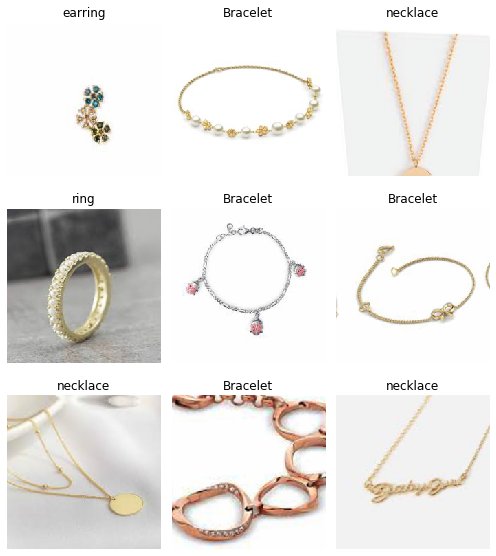

In [36]:
data.show_batch(rows=3, figsize=(7,8))


In [0]:
learn = cnn_learner(data, models.resnet152, metrics=accuracy)


In [38]:
learn.fit_one_cycle(1)


epoch,train_loss,valid_loss,accuracy,time
0,0.648031,0.301745,0.886044,01:04


In [0]:
learn.save('stage-1')

## Results

In [40]:
interp = ClassificationInterpretation.from_learner(learn)

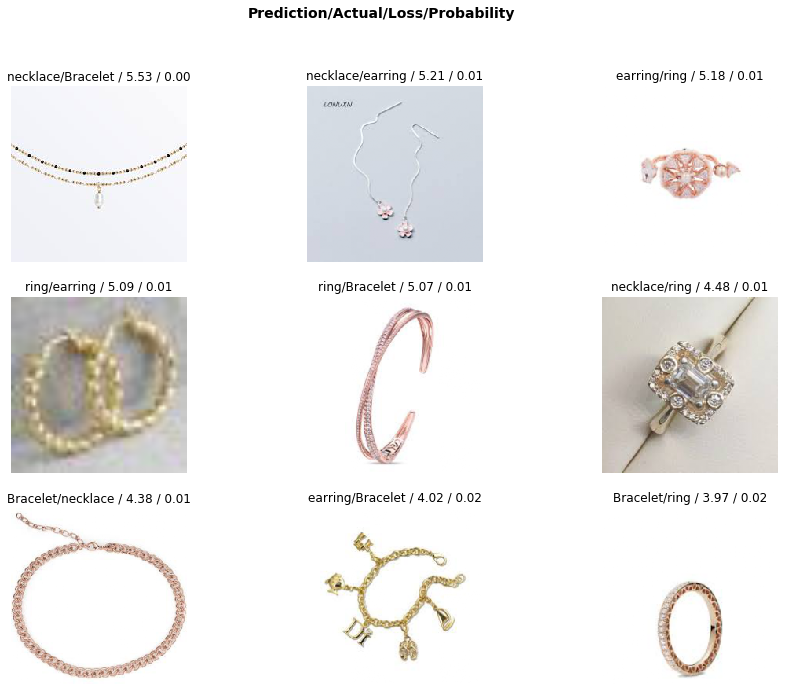

In [41]:

interp.plot_top_losses(9, figsize=(15,11), heatmap=False)

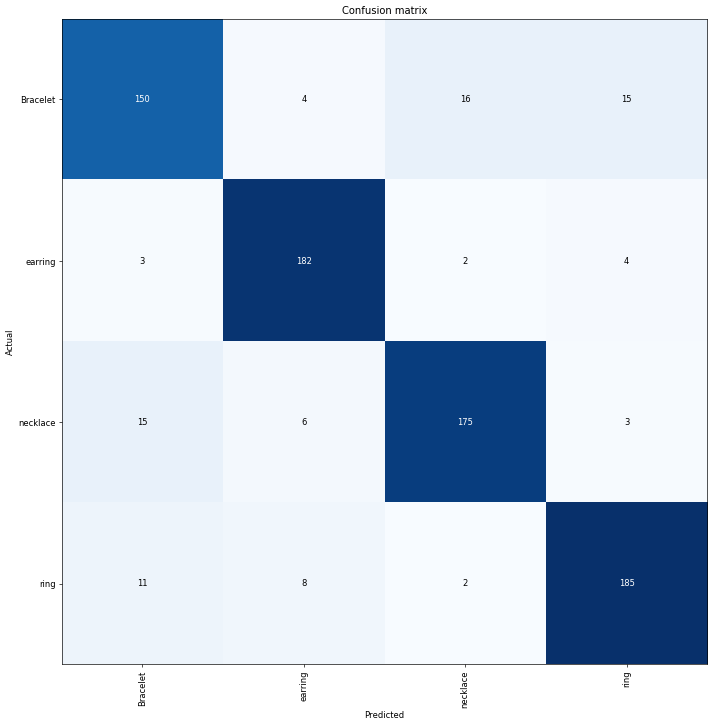

In [42]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)


In [43]:
interp.most_confused(min_val = 2)

[('Bracelet', 'necklace', 16),
 ('Bracelet', 'ring', 15),
 ('necklace', 'Bracelet', 15),
 ('ring', 'Bracelet', 11),
 ('ring', 'earring', 8),
 ('necklace', 'earring', 6),
 ('Bracelet', 'earring', 4),
 ('earring', 'ring', 4),
 ('earring', 'Bracelet', 3),
 ('necklace', 'ring', 3),
 ('earring', 'necklace', 2),
 ('ring', 'necklace', 2)]

## Unfreezing, fine-tuning, and learning rates

In [0]:
learn.unfreeze()

In [45]:
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,accuracy,time
0,0.574832,0.326980,0.900128,01:28


In [46]:
learn.load('stage-1')

FileNotFoundError: ignored

In [47]:
learn.lr_find()

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


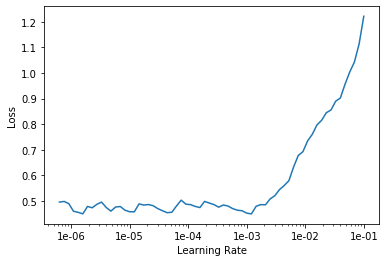

In [48]:
learn.recorder.plot()

In [49]:
learn.unfreeze()
learn.fit_one_cycle(1,max_lr=slice(3e-5,3e-4))

epoch,train_loss,valid_loss,accuracy,time
0,0.396664,0.229366,0.916773,01:29


In [0]:
learn.save('stage-2')

##Interpretation

In [52]:
learn.load('stage-2')

Learner(data=ImageDataBunch;

Train: LabelList (3124 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
earring,earring,earring,earring,earring
Path: /content/drive/My Drive/Jewls/Train;

Valid: LabelList (781 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
earring,ring,ring,Bracelet,ring
Path: /content/drive/My Drive/Jewls/Train;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps

In [53]:
interp= ClassificationInterpretation.from_learner(learn)

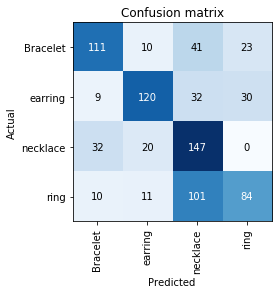

In [54]:
interp.plot_confusion_matrix()

In [55]:
interp.most_confused(min_val = 2)

[('ring', 'necklace', 101),
 ('Bracelet', 'necklace', 41),
 ('earring', 'necklace', 32),
 ('necklace', 'Bracelet', 32),
 ('earring', 'ring', 30),
 ('Bracelet', 'ring', 23),
 ('necklace', 'earring', 20),
 ('ring', 'earring', 11),
 ('Bracelet', 'earring', 10),
 ('ring', 'Bracelet', 10),
 ('earring', 'Bracelet', 9)]

In [0]:
learn.save('final_model')

In [57]:
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Sequential(
          (0): Conv2d(64, 256

In [0]:
class SaveFeatures():
    features=None
    def __init__(self, m): 
        self.hook = m.register_forward_hook(self.hook_fn)
        self.features = None
    def hook_fn(self, module, input, output): 
        out = output.detach().cpu().numpy()
        if isinstance(self.features, type(None)):
            self.features = out
        else:
            self.features = np.row_stack((self.features, out))
    def remove(self): 
        self.hook.remove()

In [60]:
# Second last layer of the model
learn.model[1][4]

Linear(in_features=4096, out_features=512, bias=True)

In [0]:
sf = SaveFeatures(learn.model[1][4])

In [62]:
_= learn.get_preds(data.train_ds)
_= learn.get_preds(DatasetType.Valid)

In [63]:
len(sf.features)

3905

In [64]:
sf.features

array([[ -25.95491 ,   40.10073 ,   33.38861 ,   28.036057, ...,  -28.854252,   18.534876,  -18.703482,  -17.368263],
       [  60.802635,  -83.11218 ,  -23.660782,  -54.816864, ...,   86.58151 ,  -26.469753,   88.238525,    6.459376],
       [ 112.81444 , -162.95467 ,  -54.466118,  -93.96677 , ...,  165.07535 ,  -40.950123,  166.64445 ,   21.678919],
       [ -13.413472,   23.332743,   16.217329,   11.721691, ...,  -17.844551,   -4.289828,   -4.24178 ,  -12.36365 ],
       ...,
       [ -19.576073,   44.14476 ,   33.02749 ,   23.828957, ...,  -28.506649,   19.639015,  -23.04081 ,  -16.308697],
       [ 118.494194, -153.21823 ,  -54.75157 , -113.87122 , ...,  156.88864 ,  -56.246475,  133.51254 ,   12.431009],
       [  94.64528 , -134.40909 ,  -44.679688,  -90.57087 , ...,  136.78682 ,  -40.69372 ,  130.56021 ,   15.348088],
       [  88.90663 , -126.46513 ,  -50.290985,  -79.73082 , ...,  127.31498 ,  -41.559082,  123.95424 ,   18.199091]],
      dtype=float32)

In [0]:
img_path = [str(x) for x in (list(data.train_ds.items) + list(data.valid_ds.items))]

In [0]:
label = [data.classes[x] for x in (list(data.train_ds.y.items) + list(data.valid_ds.y.items))]

In [0]:
label_id = [x for x in (list(data.train_ds.y.items) + list(data.valid_ds.y.items))]

In [68]:
len(img_path), len(label), len(label_id)

(3905, 3905, 3905)

In [69]:
df_new = pd.DataFrame({'img_path': img_path, 'label': label, 'label_id': label_id})
df_new.head()

,img_path,label,label_id
0,/content/drive/My Drive/Jewls/Train/earring/im...,earring,1
1,/content/drive/My Drive/Jewls/Train/earring/im...,earring,1
2,/content/drive/My Drive/Jewls/Train/earring/im...,earring,1
3,/content/drive/My Drive/Jewls/Train/earring/im...,earring,1
4,/content/drive/My Drive/Jewls/Train/earring/ea...,earring,1


In [0]:
array = np.array(sf.features)
x = array.tolist()

In [0]:
df_new['img_repr'] = x

In [72]:
df_new.head()

,img_path,label,label_id,img_repr
0,/content/drive/My Drive/Jewls/Train/earring/im...,earring,1,"[-25.954910278320312, 40.100730895996094, 33.3..."
1,/content/drive/My Drive/Jewls/Train/earring/im...,earring,1,"[60.802635192871094, -83.1121826171875, -23.66..."
2,/content/drive/My Drive/Jewls/Train/earring/im...,earring,1,"[112.81443786621094, -162.9546661376953, -54.4..."
3,/content/drive/My Drive/Jewls/Train/earring/im...,earring,1,"[-13.413472175598145, 23.33274269104004, 16.21..."
4,/content/drive/My Drive/Jewls/Train/earring/ea...,earring,1,"[73.14057922363281, -91.5771713256836, -22.694..."


In [0]:
def show_similar_images(similar_images_df):
    images = [open_image(img_id) for img_id in similar_images_df['img_path']]
    categories = [learn.data.train_ds.y.reconstruct(y) for y in similar_images_df['label_id']]
    return learn.data.show_xys(images, categories)

In [74]:
!pip install annoy

     |████████████████████████████████| 645kB 3.5MB/s 
  Created wheel for annoy: filename=annoy-1.16.3-cp36-cp36m-linux_x86_64.whl size=297357 sha256=80054d4c834bf3b0c14d9993409081c581ba60d0cc3ebe7ad5a06c6161c0617c
  Stored in directory: /root/.cache/pip/wheels/f3/01/54/6ef760fe9f9fc6ba8c19cebbe6358212b5f3b5b0195c0b813f
Successfully built annoy


In [0]:
from annoy import AnnoyIndex

In [0]:
f = len(df_new['img_repr'][0])
t = AnnoyIndex(f, metric = 'euclidean')

In [77]:
f

512

In [78]:
t

In [0]:
ntree = 50

for i, vector in enumerate(df_new['img_repr']):
  t.add_item(i, vector)
_ = t.build(ntree)

In [0]:
import time

In [0]:
def get_similar_images_annoy(img_index):
    start = time.time()
    base_img_id, base_vector, base_label  = df_new.iloc[img_index, [0, 3, 1]]
    similar_img_ids = t.get_nns_by_item(img_index, 8)
    end = time.time()
    print(f'{(end - start) * 1000} ms')
    return base_img_id, base_label, df_new.iloc[similar_img_ids]

In [83]:
base_image, base_label, similar_images_df = get_similar_images_annoy(284)

1.9869804382324219 ms


earring


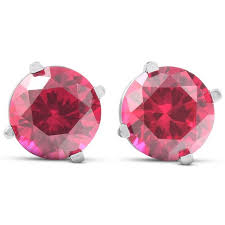

In [84]:
print(base_label)
open_image(base_image)

In [85]:
similar_images_df

,img_path,label,label_id,img_repr
284,/content/drive/My Drive/Jewls/Train/earring/im...,earring,1,"[-16.949628829956055, 38.044254302978516, 17.0..."
16,/content/drive/My Drive/Jewls/Train/earring/im...,earring,1,"[-20.874298095703125, 34.284027099609375, 18.1..."
276,/content/drive/My Drive/Jewls/Train/earring/im...,earring,1,"[-18.346572875976562, 34.9311408996582, 23.512..."
687,/content/drive/My Drive/Jewls/Train/earring/do...,earring,1,"[-14.604650497436523, 33.5760498046875, 19.231..."
3433,/content/drive/My Drive/Jewls/Train/earring/do...,earring,1,"[-17.83964729309082, 34.25707244873047, 15.044..."
483,/content/drive/My Drive/Jewls/Train/earring/im...,earring,1,"[-24.14737319946289, 39.042449951171875, 18.99..."
804,/content/drive/My Drive/Jewls/Train/earring/do...,earring,1,"[-17.255521774291992, 36.994972229003906, 22.9..."
3840,/content/drive/My Drive/Jewls/Train/earring/ea...,earring,1,"[-21.432540893554688, 39.72930145263672, 21.90..."


In [0]:
def show_similar_images(similar_images_df):
    images = [open_image(img_id) for img_id in similar_images_df['img_path']]
    categories = [learn.data.train_ds.y.reconstruct(y) for y in similar_images_df['label_id']]
    return learn.data.show_xys(images, categories)
  

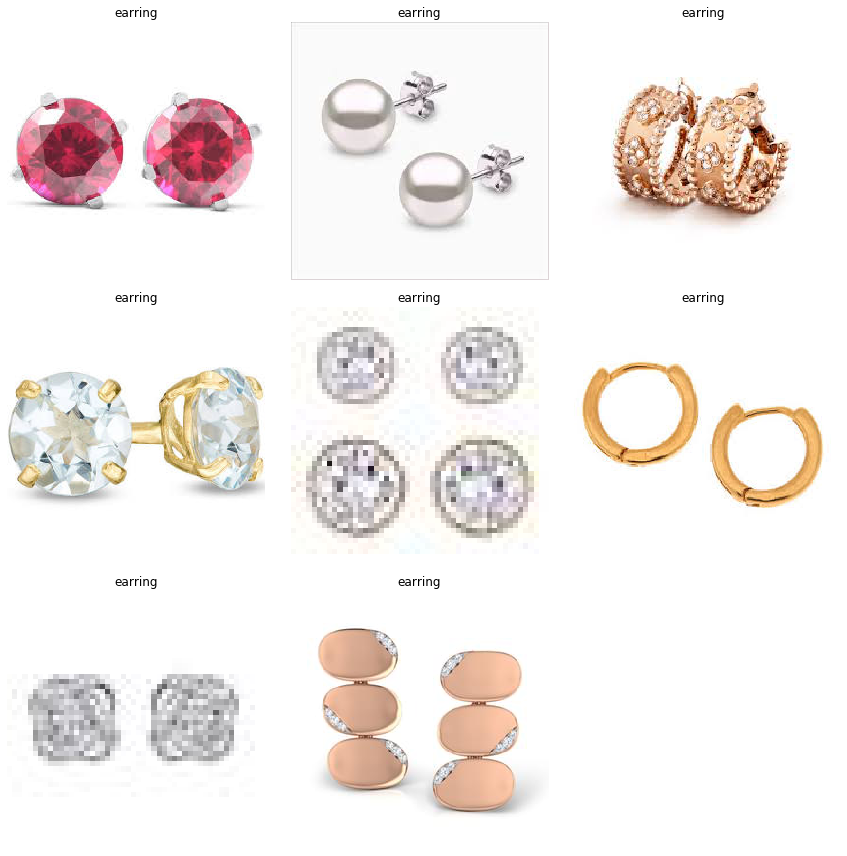

In [87]:
show_similar_images(similar_images_df)

## Cosine similarity

In [0]:
from scipy.spatial.distance import cosine

In [0]:
def get_similar_images(img_index, n=5):
    start = time.time()
    base_img_id, base_vector, base_label  = df_new.iloc[img_index, [0, 3, 1]]
    cosine_similarity = 1 - df_new['img_repr'].apply(lambda x: cosine(x, base_vector))
    similar_img_ids = np.argsort(cosine_similarity)[-11:-1][::-1]
    end = time.time()
    print(f'{end - start} secs')
    return base_img_id, base_label, df_new.iloc[similar_img_ids]

In [90]:
base_image, base_label, similar_images_df = get_similar_images_annoy(284)

1.2047290802001953 ms


earring


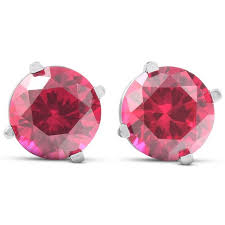

In [91]:
print(base_label)
open_image(base_image)

In [92]:
similar_images_df

,img_path,label,label_id,img_repr
284,/content/drive/My Drive/Jewls/Train/earring/im...,earring,1,"[-16.949628829956055, 38.044254302978516, 17.0..."
16,/content/drive/My Drive/Jewls/Train/earring/im...,earring,1,"[-20.874298095703125, 34.284027099609375, 18.1..."
276,/content/drive/My Drive/Jewls/Train/earring/im...,earring,1,"[-18.346572875976562, 34.9311408996582, 23.512..."
687,/content/drive/My Drive/Jewls/Train/earring/do...,earring,1,"[-14.604650497436523, 33.5760498046875, 19.231..."
3433,/content/drive/My Drive/Jewls/Train/earring/do...,earring,1,"[-17.83964729309082, 34.25707244873047, 15.044..."
483,/content/drive/My Drive/Jewls/Train/earring/im...,earring,1,"[-24.14737319946289, 39.042449951171875, 18.99..."
804,/content/drive/My Drive/Jewls/Train/earring/do...,earring,1,"[-17.255521774291992, 36.994972229003906, 22.9..."
3840,/content/drive/My Drive/Jewls/Train/earring/ea...,earring,1,"[-21.432540893554688, 39.72930145263672, 21.90..."


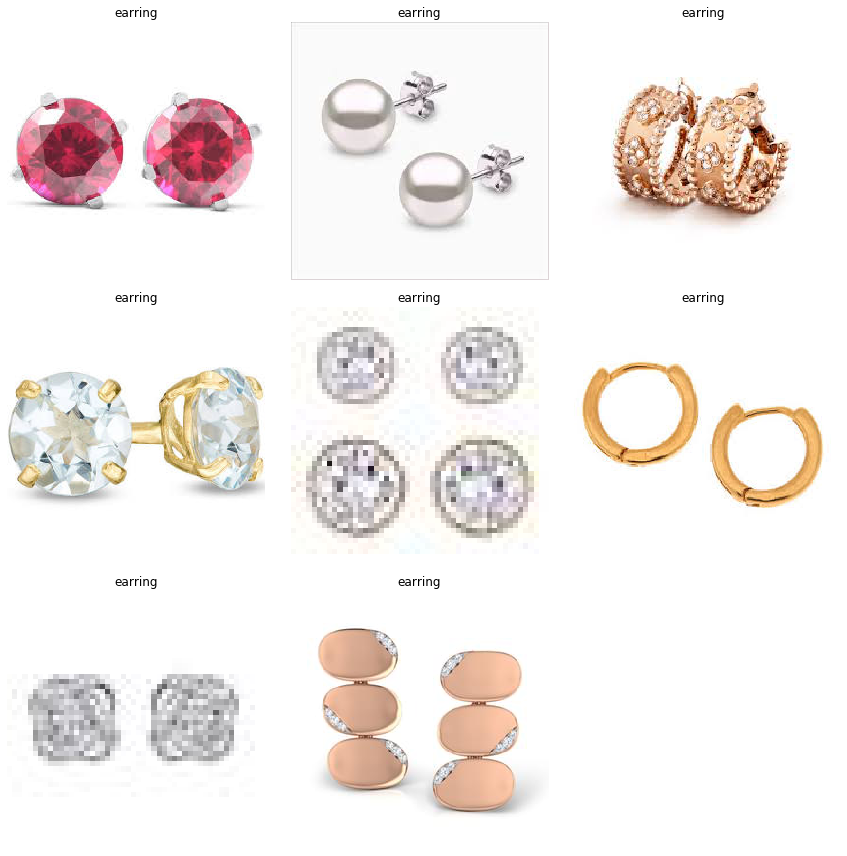

In [93]:
show_similar_images(similar_images_df)

#Putting your model in Production


In [0]:
data.classes

In [0]:
img_path = ('/content/drive/My Drive/Jewls/Test/earring/images - 2020-02-06T195819.166.jpeg')
img = open_image(img_path)
img

In [0]:
classes = ['Bracelet','earring','necklace','ring']
data2 = ImageDataBunch.single_from_classes(PATH,
                                           classes,
                                           ds_tfms = get_transforms(),
                                           size = 224).normalize(imagenet_stats)
learn = cnn_learner(data2,models.resnet152)
learn.load('stage-2')

In [0]:
pred_class, pred_idx,outputs= learn.predict(img)
pred_class